# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analyzing 

In [2]:
# Load the dataset
df = pd.read_csv('TSLA.csv')

# Show first few rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,2.333333,2.363333,2.314000,2.357333,2.357333,17922000
1,2013-01-03,2.345333,2.363333,2.316667,2.318000,2.318000,11130000
2,2013-01-04,2.320000,2.320000,2.261333,2.293333,2.293333,10110000
3,2013-01-07,2.320000,2.320000,2.260000,2.289333,2.289333,6630000
4,2013-01-08,2.300000,2.300000,2.207333,2.245333,2.245333,19260000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2518 non-null   object 
 1   Open       2518 non-null   float64
 2   High       2518 non-null   float64
 3   Low        2518 non-null   float64
 4   Close      2518 non-null   float64
 5   Adj Close  2518 non-null   float64
 6   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [4]:
# This code shape
df.shape

(2518, 7)

In [5]:
# This code describe
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,73.168104,74.804530,71.355799,73.102271,73.102271,1.120962e+08
std,102.115086,104.464983,99.452438,101.969056,101.969056,8.078159e+07
min,2.205333,2.225333,2.140667,2.194000,2.194000,6.603000e+06
25%,14.523500,14.765333,14.285334,14.544000,14.544000,6.290422e+07
50%,18.900333,19.239334,18.574666,18.954333,18.954333,8.918415e+07
75%,79.123998,80.322169,77.288334,79.093498,79.093498,1.311840e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


# Data Cleaning

In [6]:
# This code isnull.sum
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
# Convert 'Date' to datetime if needed
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.set_index('Date', inplace=True)

In [9]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


# EDA

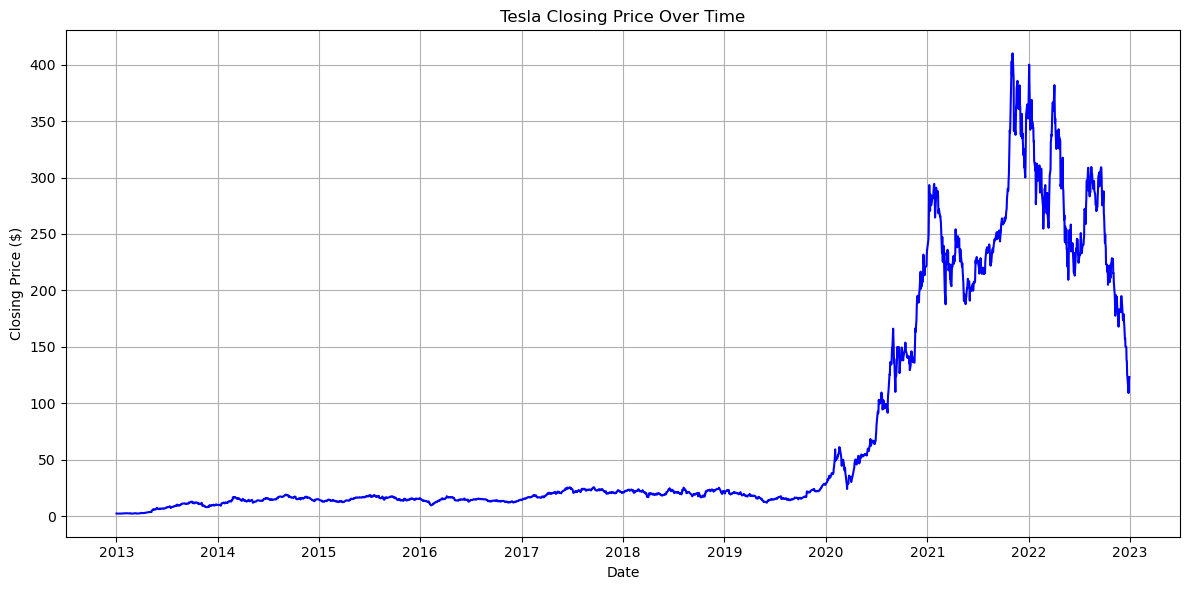

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], color='blue')
plt.title('Tesla Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

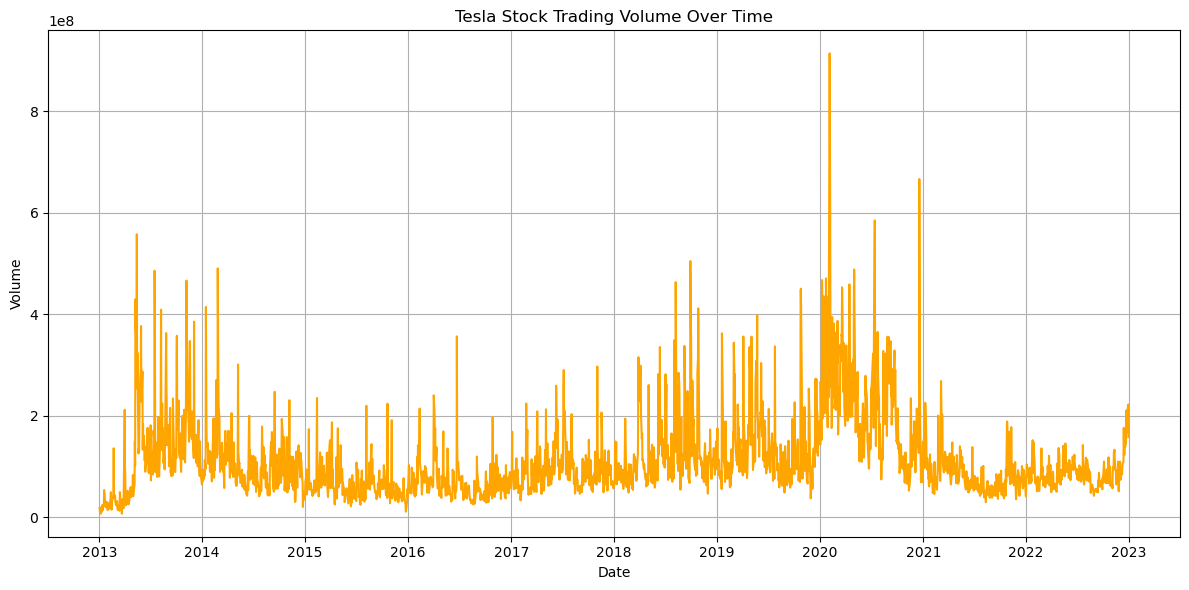

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'], color='orange')
plt.title('Tesla Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

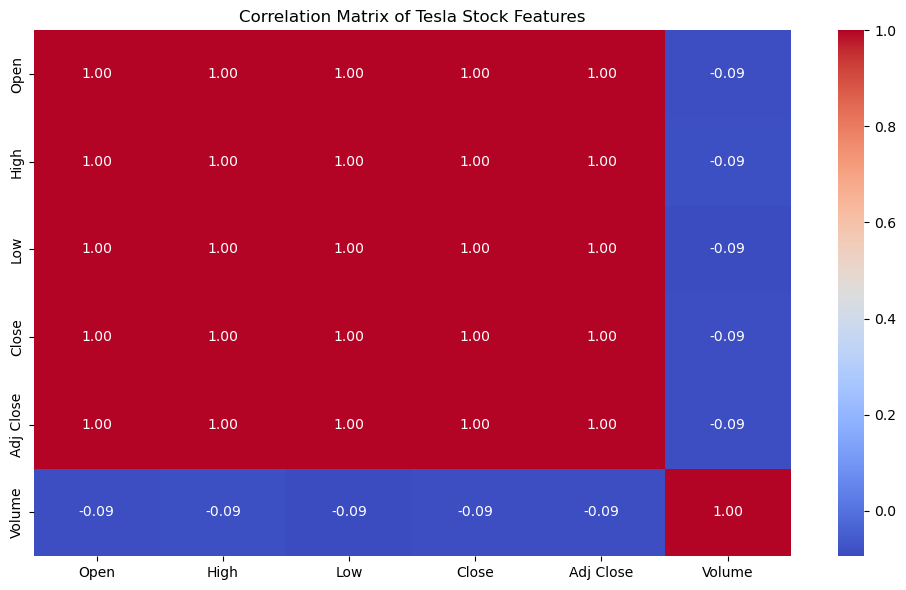

In [12]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Tesla Stock Features')
plt.tight_layout()
plt.show()

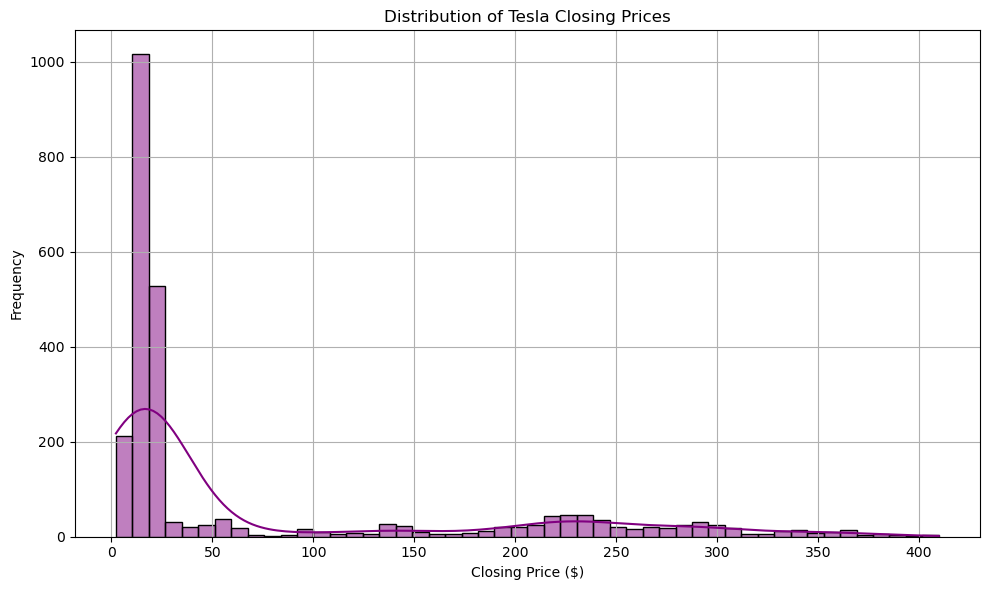

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True, color='purple')
plt.title('Distribution of Tesla Closing Prices')
plt.xlabel('Closing Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

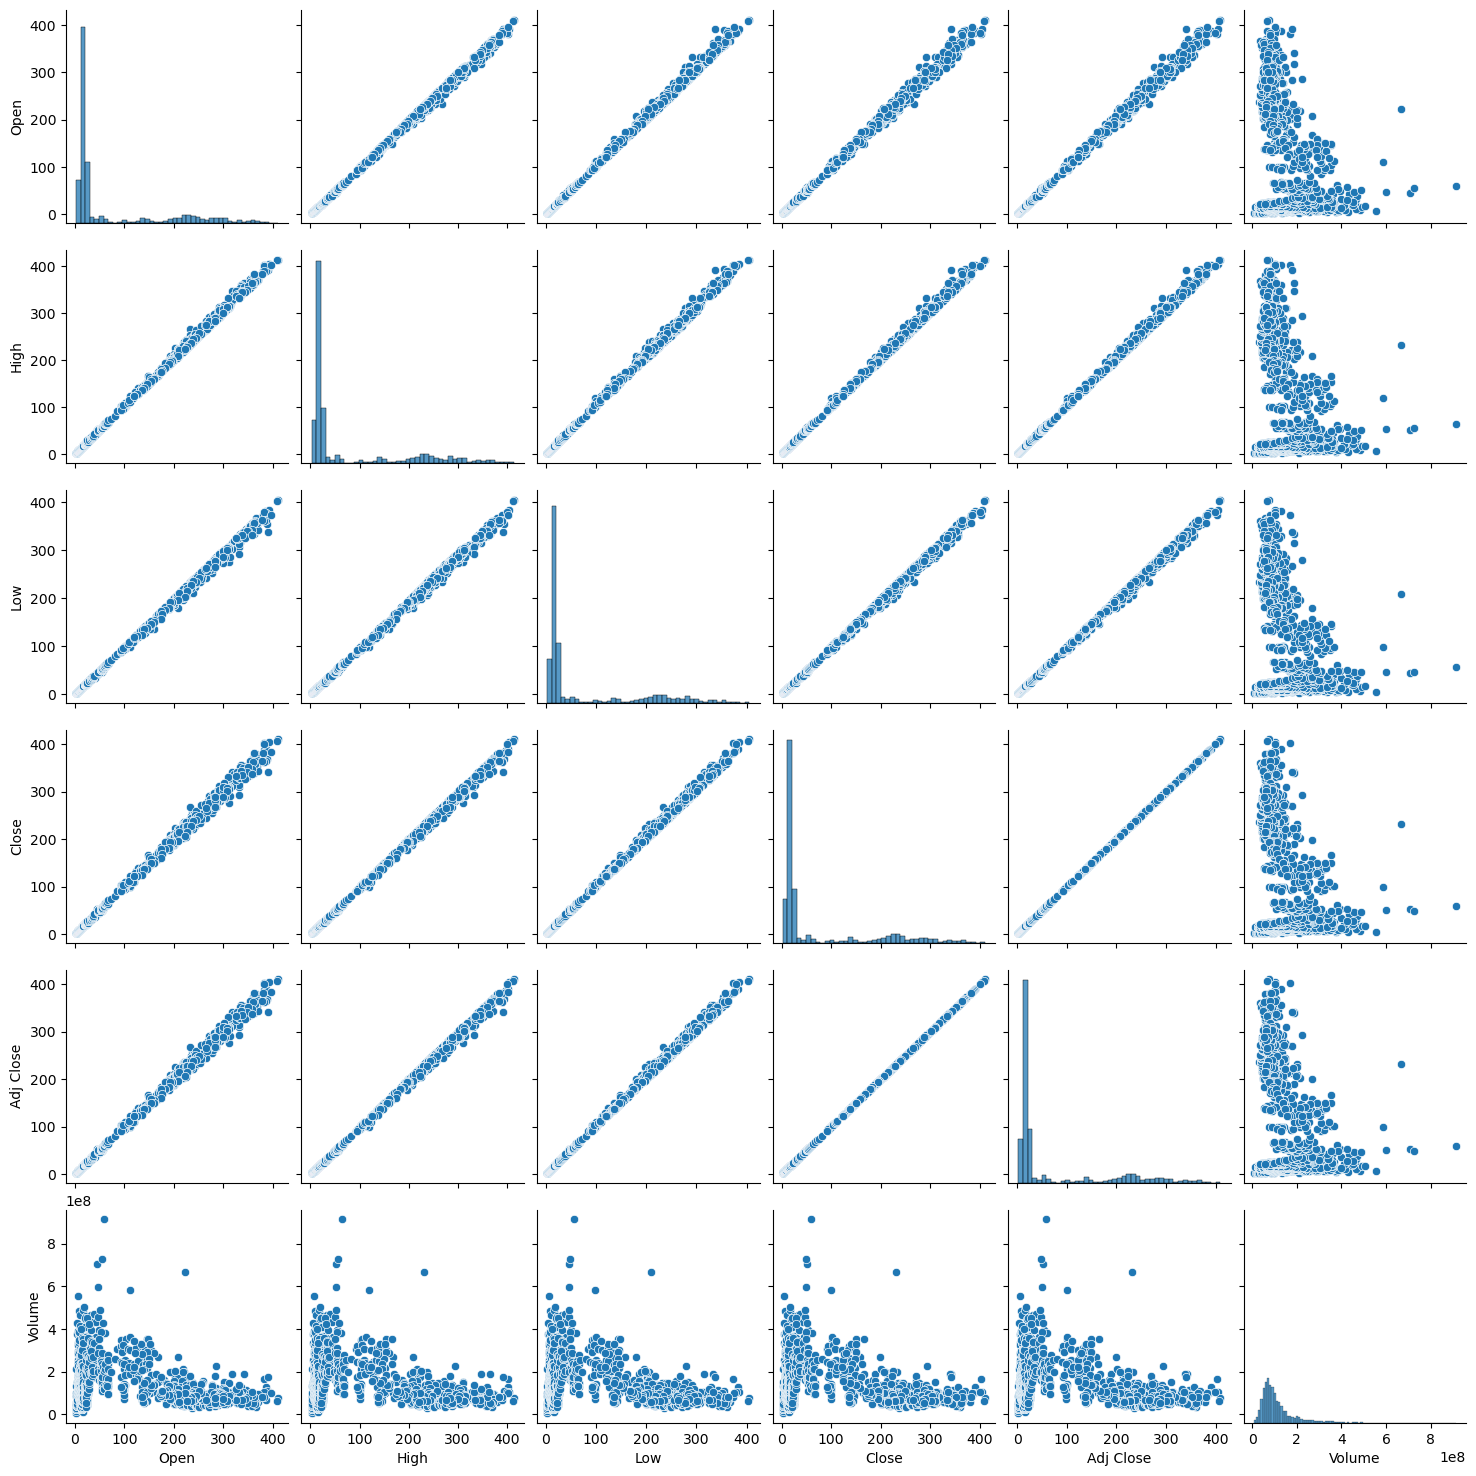

In [14]:
sns.pairplot(df)

In [15]:
# Features: 'Open', 'High', 'Low', 'Volume' (Assuming they're columns 0 to 3)
x = df.iloc[:, [0, 1, 2, 5]]  # 0=Open, 1=High, 2=Low, 5=Volume

# Target: 'Close' (Usually column 3 or 4 depending on file)
y = df.iloc[:, 3]  # or change to correct index if needed

In [16]:
x

,Open,High,Low,Volume
Date,,,,
2013-01-02,2.333333,2.363333,2.314000,17922000
2013-01-03,2.345333,2.363333,2.316667,11130000
2013-01-04,2.320000,2.320000,2.261333,10110000
2013-01-07,2.320000,2.320000,2.260000,6630000
2013-01-08,2.300000,2.300000,2.207333,19260000
...,...,...,...,...
2022-12-23,126.370003,128.619995,121.019997,166989700
2022-12-27,117.500000,119.669998,108.760002,208643400
2022-12-28,110.349998,116.269997,108.239998,221070500


In [17]:
y

Date
2013-01-02      2.357333
2013-01-03      2.318000
2013-01-04      2.293333
2013-01-07      2.289333
2013-01-08      2.245333
                 ...    
2022-12-23    123.150002
2022-12-27    109.099998
2022-12-28    112.709999
2022-12-29    121.820000
2022-12-30    123.180000
Name: Close, Length: 2518, dtype: float64

# Model Building

In [18]:
# This code from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

# random_state is used to get the same train-test split every time.
# It ensures reproducibility of results during model training and testing.
# Commonly used value is 42, known as the "standard random seed" in data science.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
# Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
# Train the model using training data
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = mse ** 0.5  # RMSE helps interpret error in same units as target (e.g., dollars)
r2 = r2_score(y_test, y_pred)  # R² Score shows how well model explains variance in data

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MSE: 3.6811697422354888
RMSE: 1.9186374702469169
R² Score: 0.9996298712784873


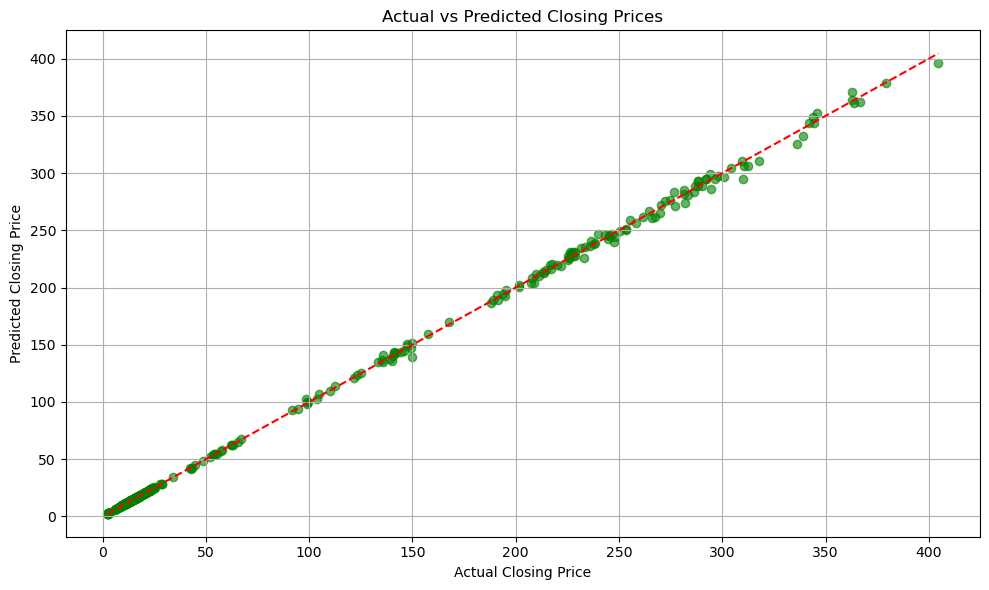

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.grid(True)
plt.tight_layout()
plt.show()